## Experimento 3:

Objetivo: Abrir todos os arquivos da base de dados,

Status: Concluído

#### Importando Bibliotecas

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import wfdb
from wfdb import processing

#### Lista de todos os arquivos para ler

In [3]:
lista = [100,101,102,103,104,105,106,107,108,109,111,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234]
len(lista)

#o 112 não foi possível abrir

47

#### Gráfico para todos os arquivos da base de dados

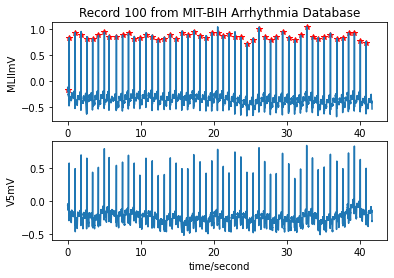

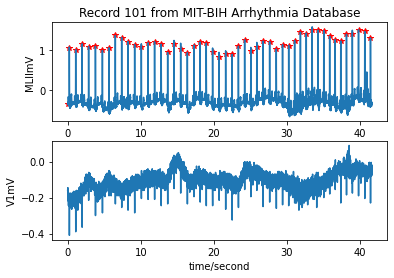

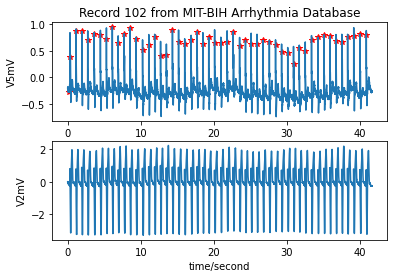

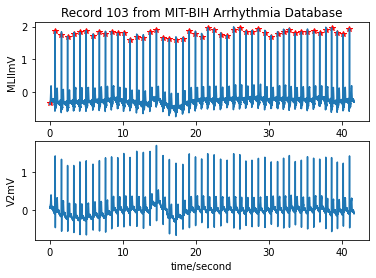

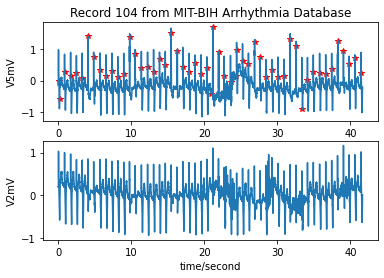

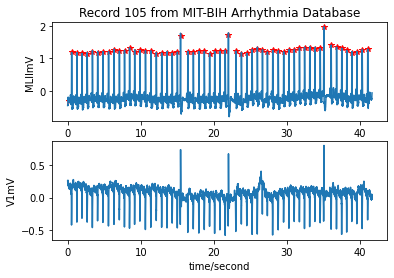

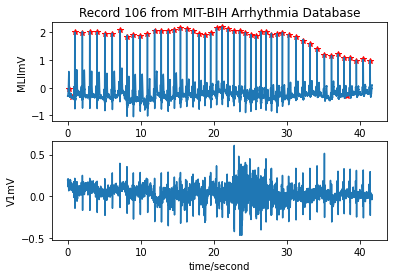

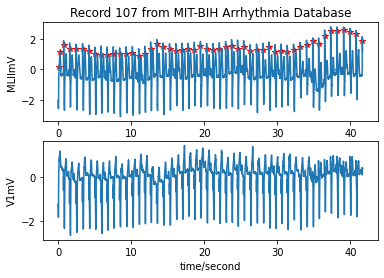

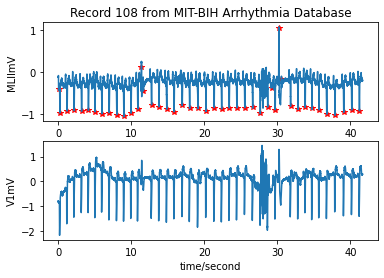

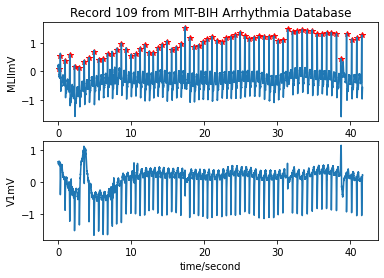

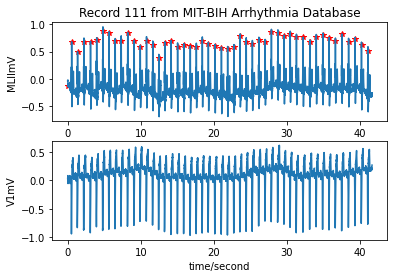

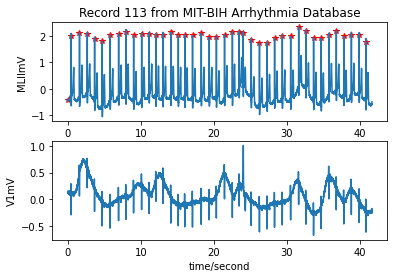

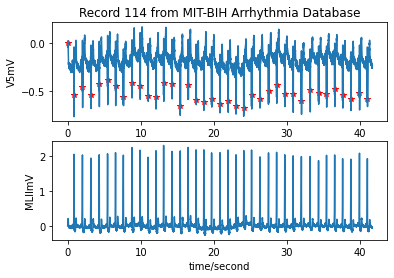

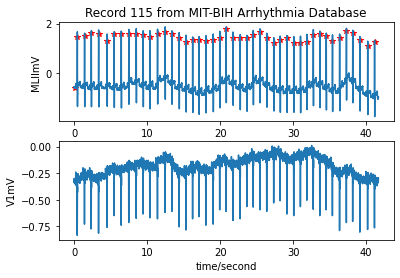

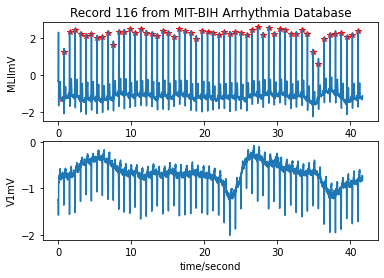

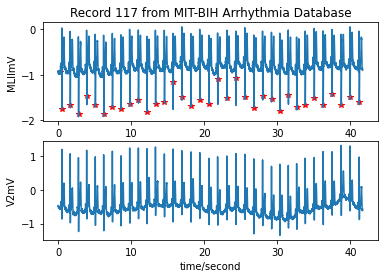

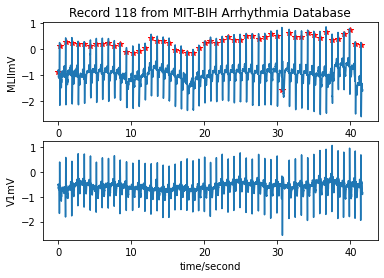

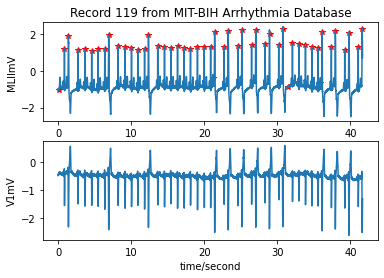

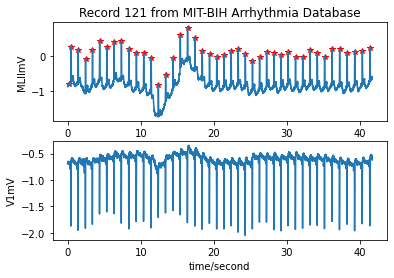

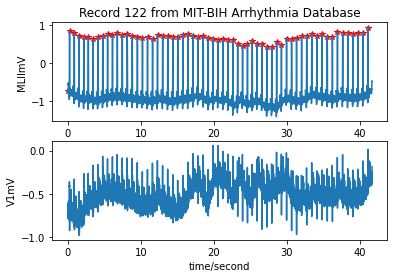

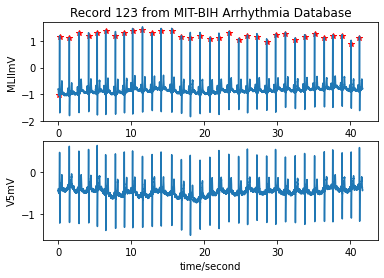

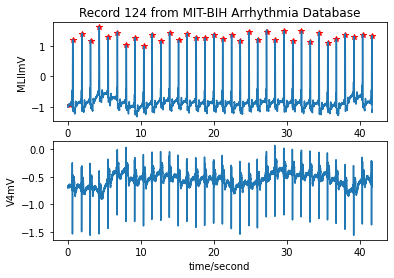

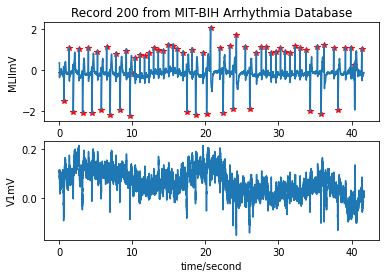

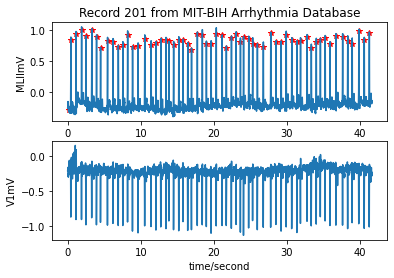

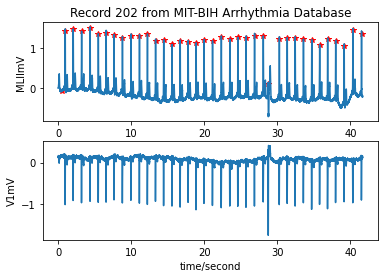

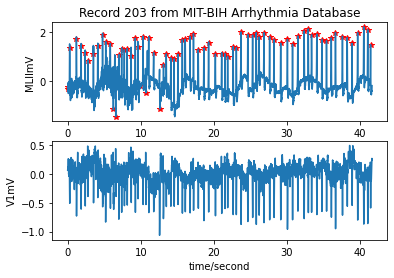

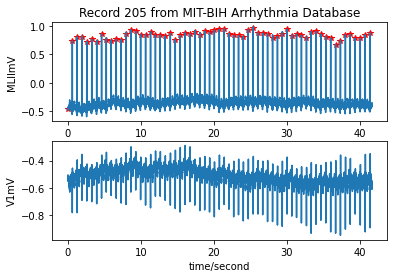

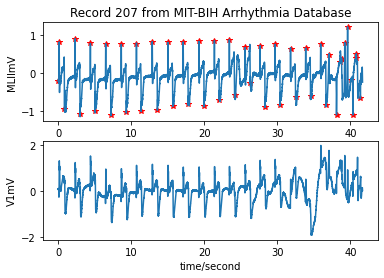

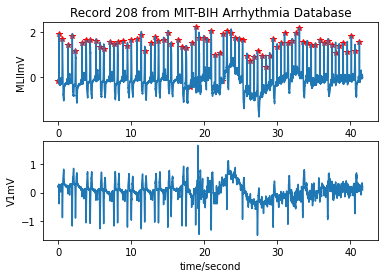

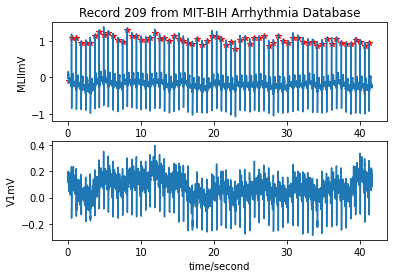

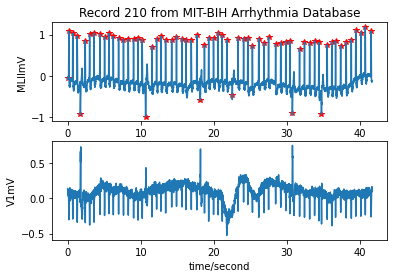

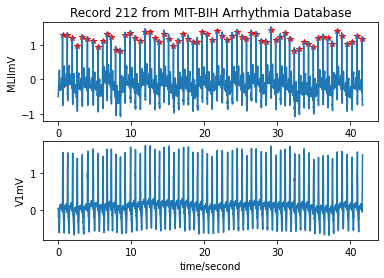

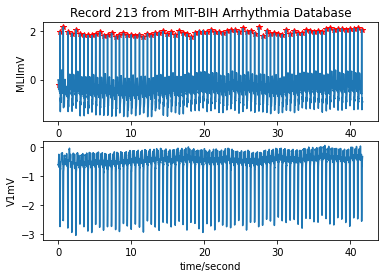

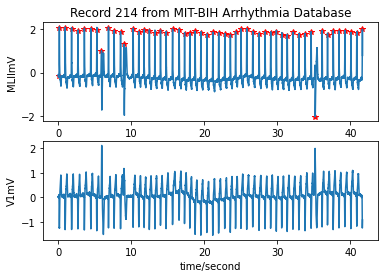

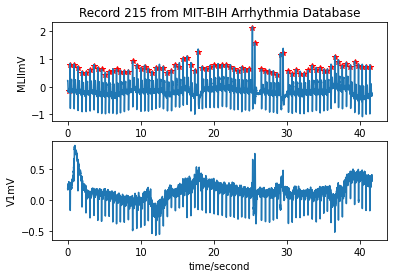

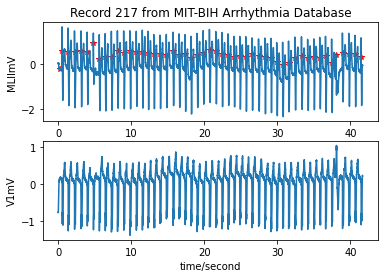

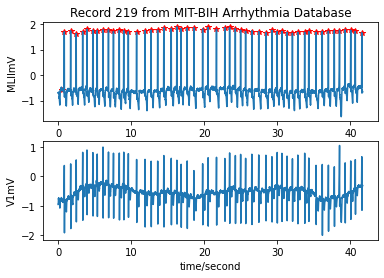

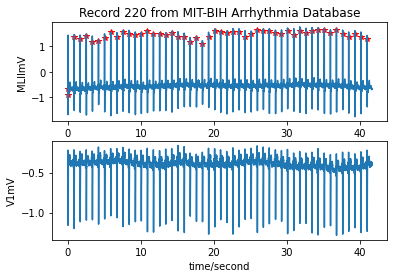

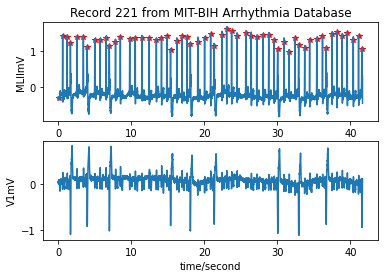

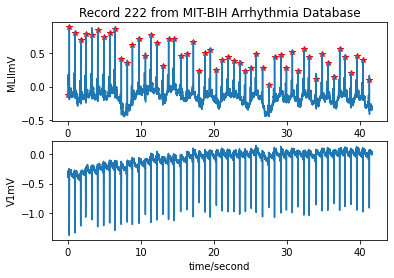

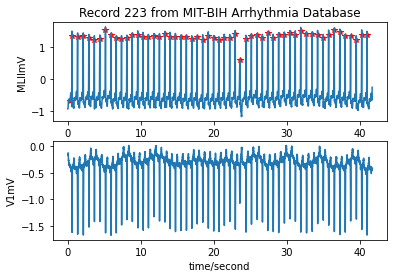

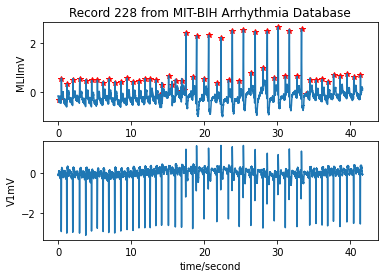

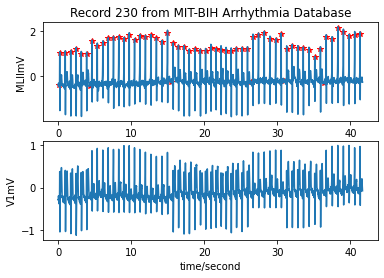

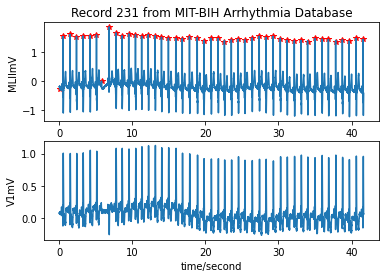

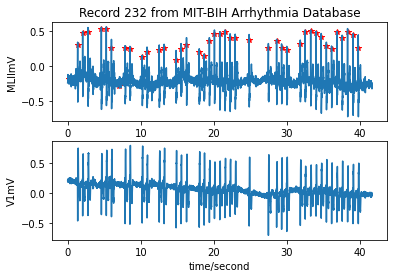

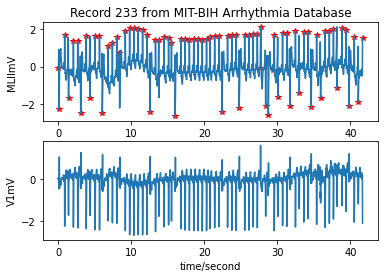

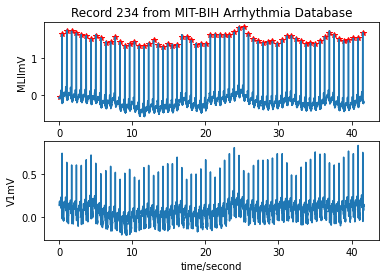

In [4]:
lista_bpm = []

for v in lista:
    record = wfdb.rdrecord((f'{v}'), sampto = 15000, pn_dir='mitdb')
    annotation = wfdb.rdann((f'{v}'), 'atr', sampto = 15000, pn_dir='mitdb')

    wfdb.plot_wfdb(record=record, annotation=annotation,
                title= (f'Record {v} from MIT-BIH Arrhythmia Database'),
                time_units='seconds')    
    
    peak_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)
    bpm = processing.hr.compute_hr(sig_len=record.p_signal.shape[0], qrs_inds=peak_inds, fs=record.fs)

    z = 0 # Variável auxiliar para evitar adicionar batimentos repetidos.
    lista_hr = [] 
    for v in bpm:
        if np.isnan(v) == False:        #retira os 'nan'
            if v != z:                  #Só adiciona valores corretos
              #print(int(v))
              lista_hr.append(int(v))
              z = v
    
    lista_bpm.append(lista_hr)
    lista_hr.clear

#### Lista com todos os BPM divididos em sublistas.

In [5]:
lista_bpm

[[73,
  76,
  75,
  76,
  73,
  91,
  60,
  71,
  73,
  75,
  77,
  71,
  70,
  73,
  72,
  72,
  75,
  75,
  75,
  72,
  69,
  72,
  76,
  75,
  77,
  76,
  73,
  72,
  71,
  74,
  77,
  75,
  76,
  69,
  71,
  72,
  74,
  72,
  75,
  76,
  73,
  70,
  68,
  72,
  77,
  74,
  73],
 [68,
  67,
  64,
  62,
  66,
  69,
  69,
  65,
  65,
  65,
  66,
  66,
  67,
  69,
  65,
  65,
  66,
  70,
  71,
  69,
  67,
  66,
  67,
  70,
  71,
  73,
  70,
  66,
  65,
  69,
  71,
  73,
  75,
  74,
  74,
  75,
  76,
  74,
  79,
  78,
  76,
  74,
  71,
  70],
 [73,
  75,
  73,
  68,
  69,
  72,
  74,
  75,
  73,
  74,
  72,
  67,
  70,
  74,
  74,
  75,
  72,
  71,
  68,
  72,
  76,
  75,
  74,
  70,
  70,
  71,
  69,
  74,
  77,
  74,
  72,
  69,
  70,
  72,
  71,
  75,
  76,
  73,
  70,
  69,
  71,
  73,
  72,
  75,
  75,
  71,
  69],
 [69,
  71,
  71,
  71,
  69,
  64,
  68,
  71,
  72,
  71,
  72,
  70,
  65,
  66,
  65,
  68,
  66,
  69,
  66,
  64,
  67,
  70,
  71,
  72,
  68,
  67,
  67,
  67,
 